In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [3]:
titanic = pd.read_csv(url)

In [4]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.shape

(891, 12)

In [8]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mode()[0])

In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'E mbarked'],
      dtype='object')

In [10]:
titanic.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'E mbarked'], inplace=True)

In [11]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])



In [15]:
titanic['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

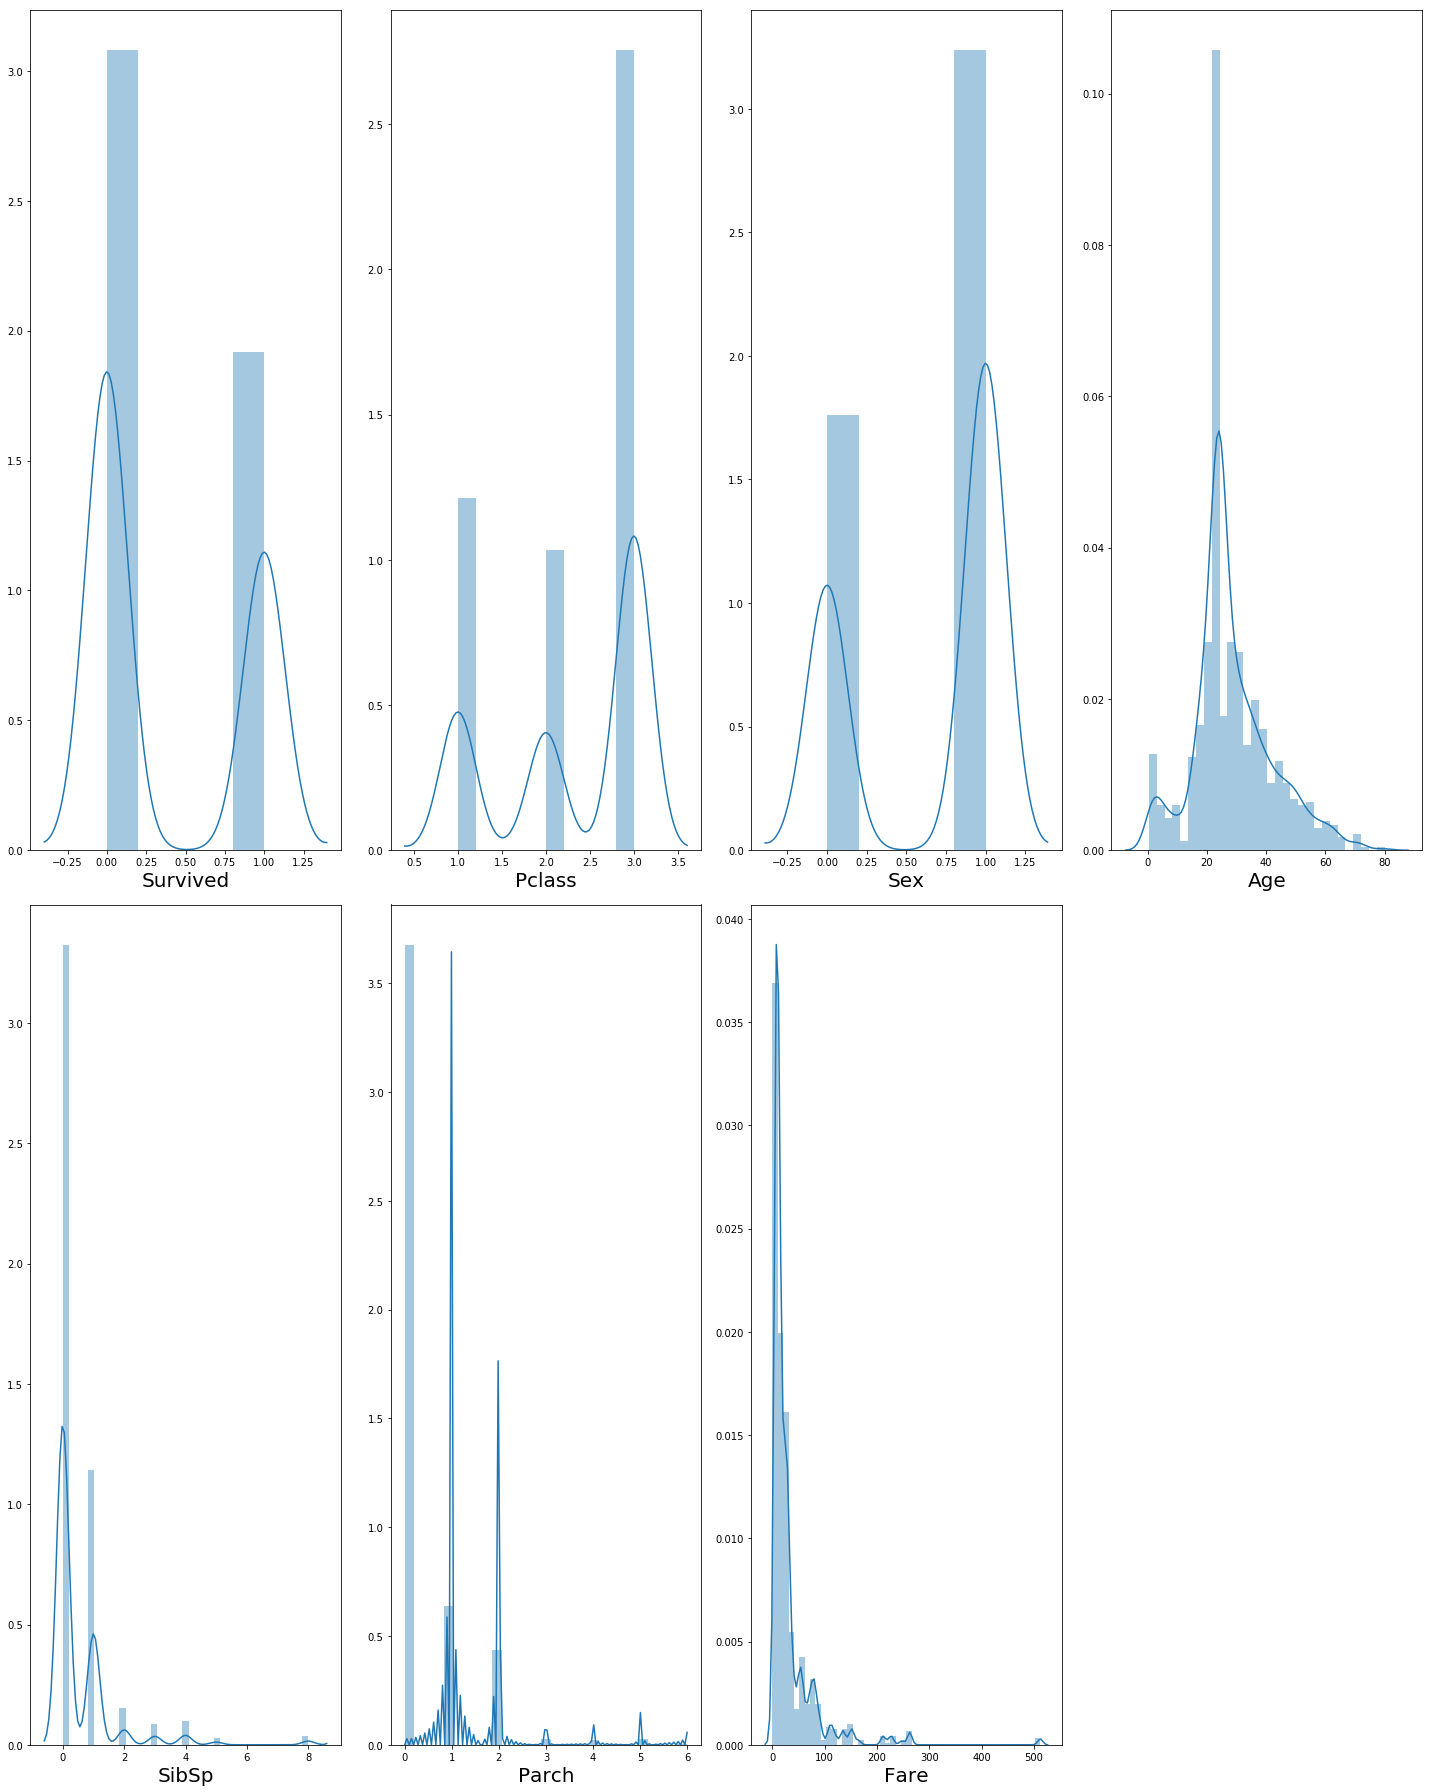

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in titanic:
    if plotnumber<=7 :
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(titanic[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Survived',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [17]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [19]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

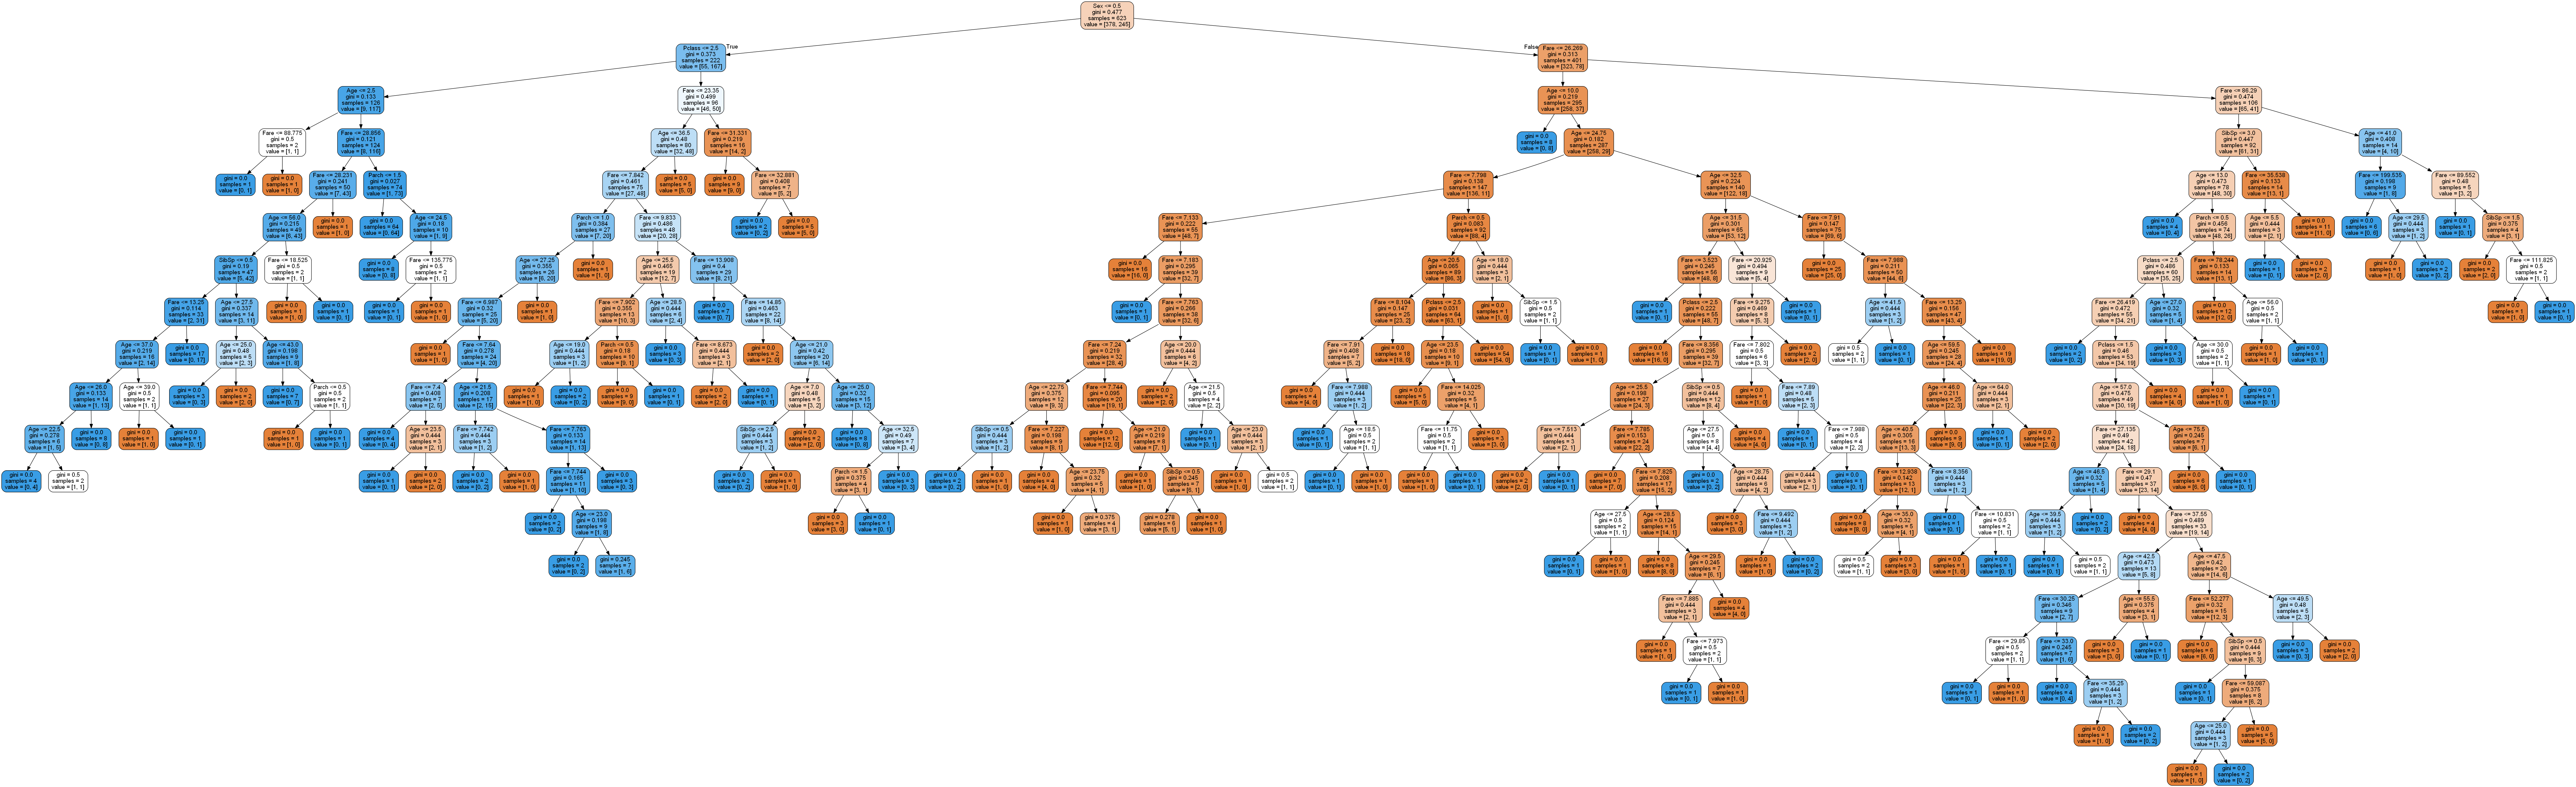

In [21]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [22]:
clf.score(x_train,y_train)

0.985553772070626

In [23]:
py_pred = clf.predict(x_test)

In [24]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.75

In [25]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,42,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(2,20,1),
    'splitter' : ['best', 'random']
    
}

In [33]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [34]:
grid_search.fit(x_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=24,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 42), 'min_samples_leaf': range(1, 20), 'min_samples_split': range(2, 20), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 9, 'splitter': 'random'}


In [36]:
grid_search.best_score_

0.8282504012841091

In [43]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =8, min_samples_leaf= 1, min_samples_split= 9, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [45]:
clf.score(x_train,y_train)

0.8426966292134831

In [46]:
clf.score(x_test,y_test)

0.8395522388059702

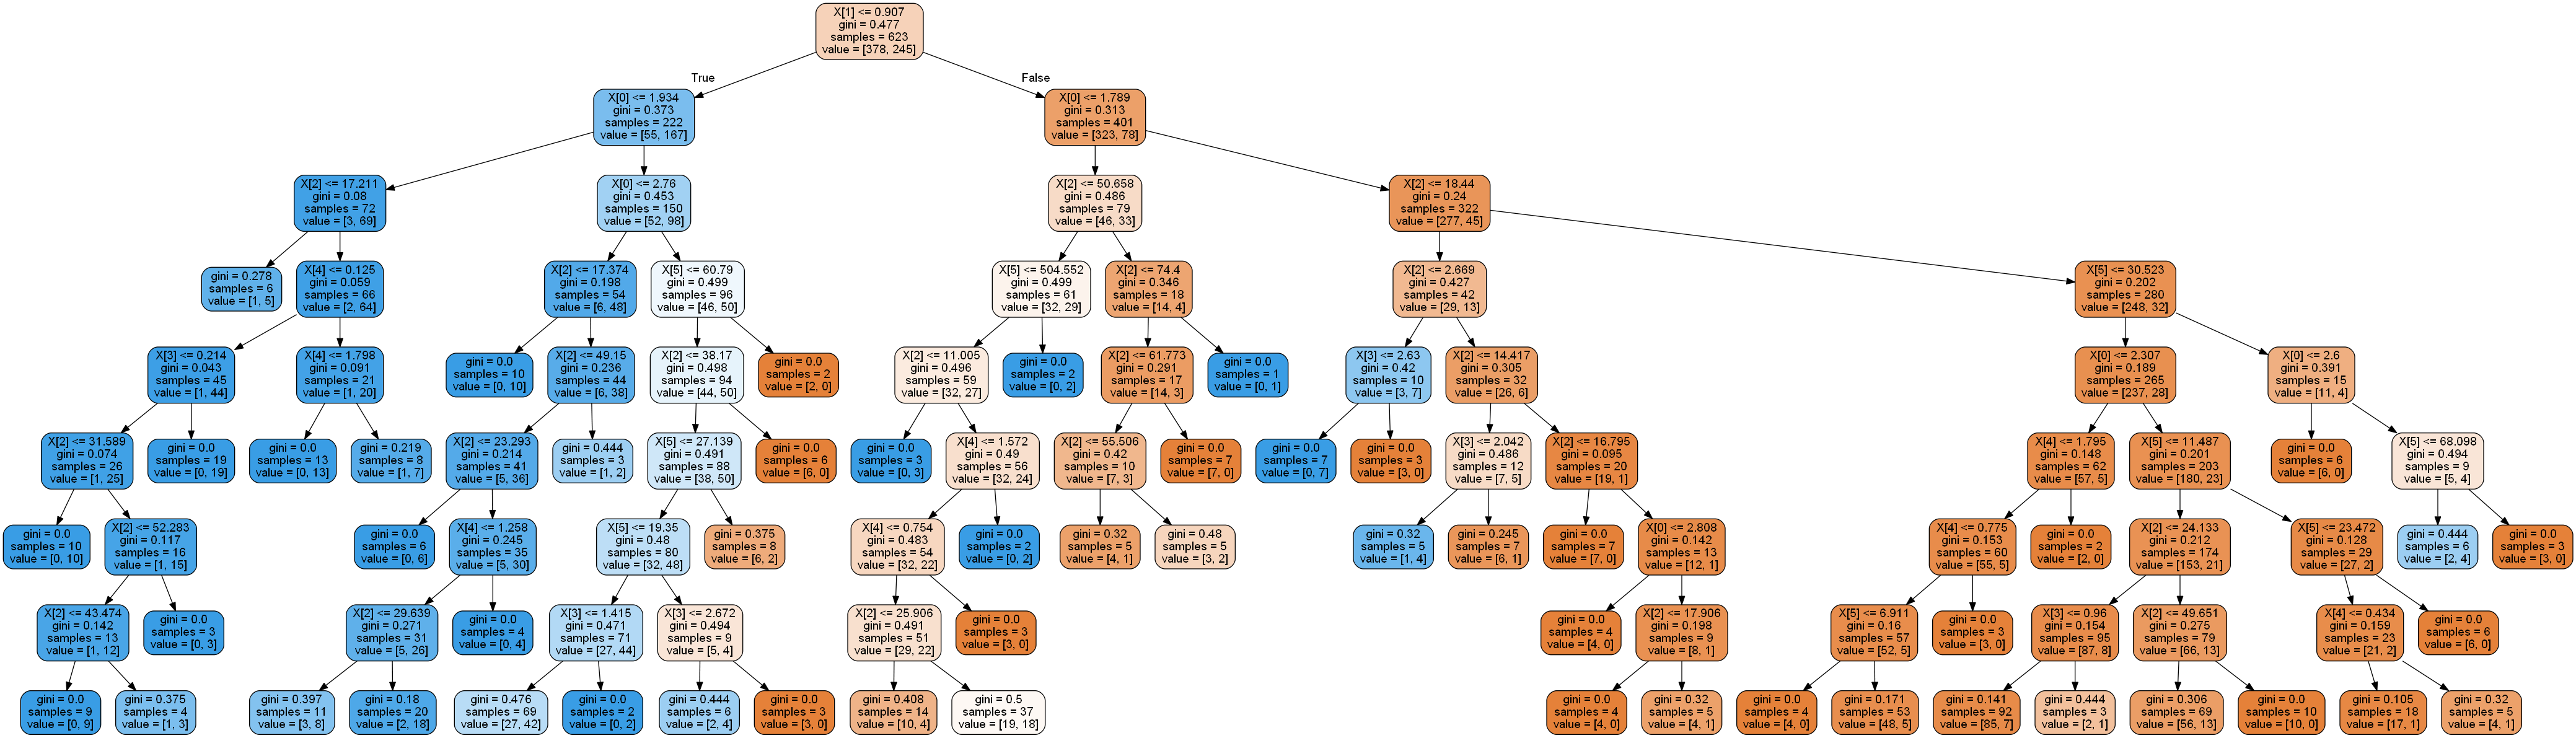

In [47]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())